In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.pyplot as mat
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('DS1_C6_S3_BazilHousing_Data_Hackathon.csv.')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [6]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [7]:
df.shape

(10692, 13)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 30:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           floor
bathroom        hoa (R$)
parking spaces  rent amount (R$)
animal          property tax (R$)
furniture       fire insurance (R$)
                total (R$)


In [22]:
def info_of_cat(col):
    print(f'Unique values in {col} are: {df[col].unique()}')
    print(f'Mode values in {col} are: {df[col].mode()[0]}')
    print(f'Missing values in {col}: are {df[col].isnull().sum()}')
    

In [23]:
def info_of_numerical(col):
    print(f'mean of the values in {col} are: {df[col].mean()}')
    print(f'median of the value in {col} are: {df[col].median()}')
    print(f'mode of the values in {col} are: {df[col].mode()[0]}')
    print(f'missing values in {col} are: {df[col].isnull().sum()}')

In [9]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [10]:
df.tail(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


# Univarient

# Name of the City.

In [11]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


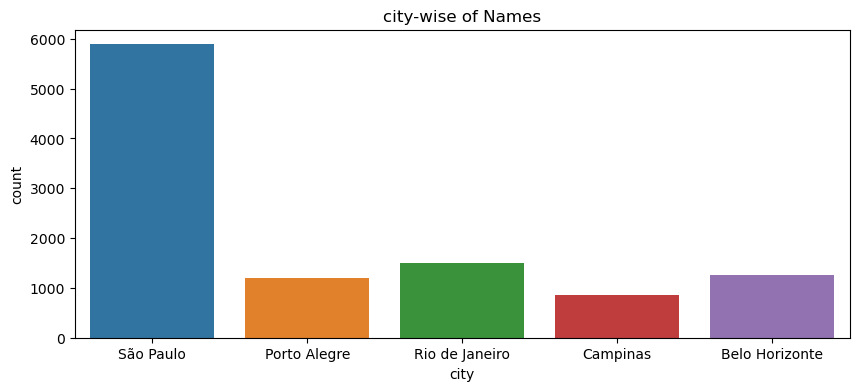

In [12]:
plt.figure(figsize=(10,4))
plt.title('city-wise of Names')
sb.countplot(data=df,x='city');

conclusion:-Sao paulo is the highest city as compare to other citys.

# Property area of the house in square meters.

In [13]:
info_of_numerical('area')

mean of the values in area are: 149.21791994014217
median of the value in area are: 90.0
mode of the values in area are: 50
missing values in area are: 0


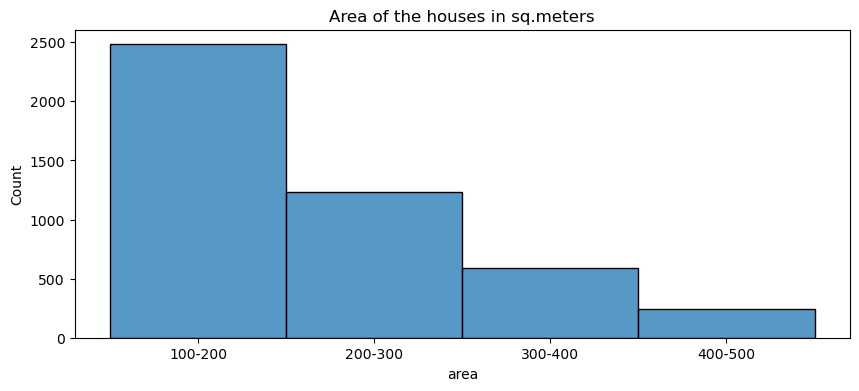

In [14]:
plt.figure(figsize=(10,4))
plt.title('Area of the houses in sq.meters')
bins=[100,200,300,400,500]
labels=['100-200','200-300','300-400','400-500']
x=pd.cut(df['area'],bins=bins,labels=labels)
sb.histplot(x=x);

conclusion:-majority of 100-200 sq.meters area of the houses.

# NO.of Rooms

In [15]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode values in rooms are: 3
Missing values in rooms: are 0


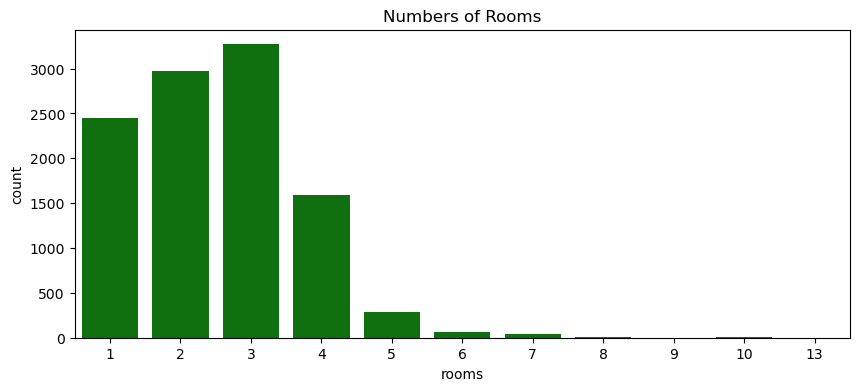

In [16]:
plt.figure(figsize=(10,4))
plt.title('Numbers of Rooms')
sb.countplot(data=df,x=df['rooms'],color='g');

conclusion:-The room number 3 have majority of other rooms.

# No.of Bathrooms

In [17]:
info_of_cat('bathroom')

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode values in bathroom are: 1
Missing values in bathroom: are 0


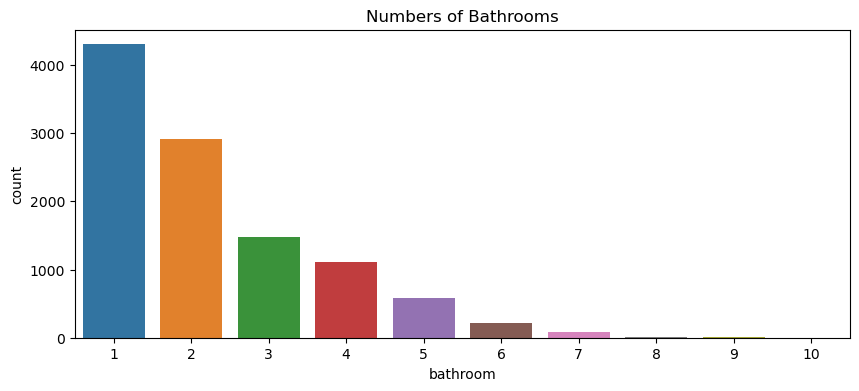

In [18]:
plt.figure(figsize=(10,4))
plt.title('Numbers of Bathrooms')
sb.countplot(data=df,x=df['bathroom']);

conclusion:-40% of population having single bathroom.

# No.of Parking spaces

In [19]:
info_of_cat('parking spaces')

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode values in parking spaces are: 1
Missing values in parking spaces: are 0


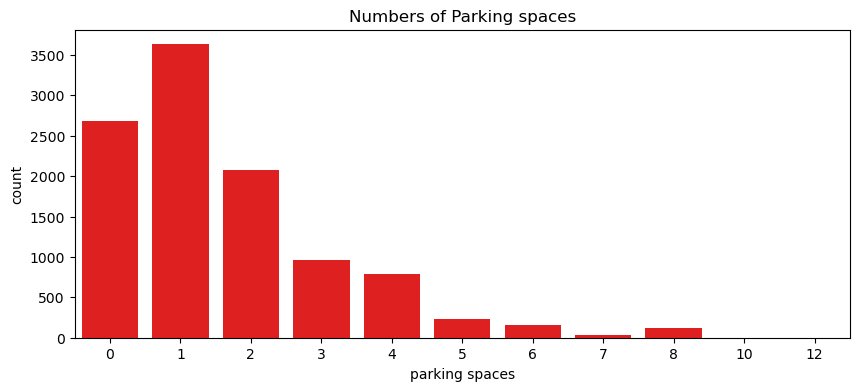

In [20]:
plt.figure(figsize=(10,4))
plt.title('Numbers of Parking spaces')
sb.countplot(data=df,x=df['parking spaces'],color='r');

 conclusion:-25% of population having no parking space.
 2.50% of population having either 1 or 2 parkinf spaces.

# No.of floors in the building

In [21]:
info_of_cat('floor')

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode values in floor are: 0
Missing values in floor: are 0


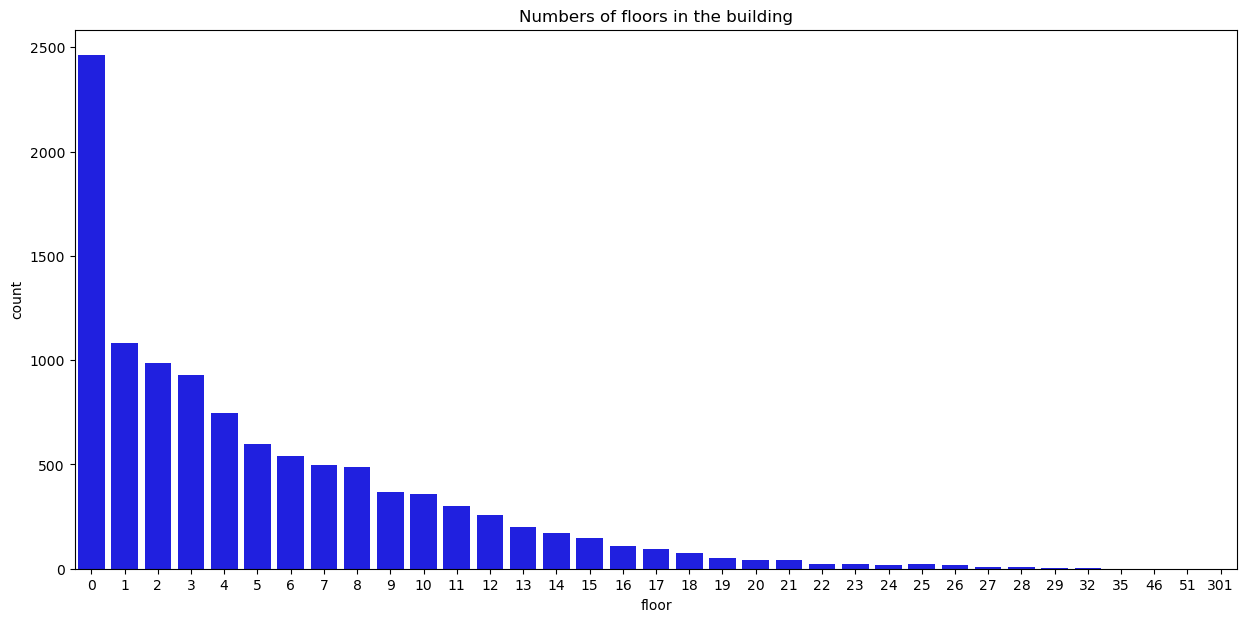

In [22]:
plt.figure(figsize=(15,7))
plt.title('Numbers of floors in the building')
sb.countplot(data=df,x=df['floor'],color='b');

conclusion:-majority of 0 No.of floors in the building.

# Whether pet animals are accepted or not.

In [23]:
info_of_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode values in animal are: acept
Missing values in animal: are 0


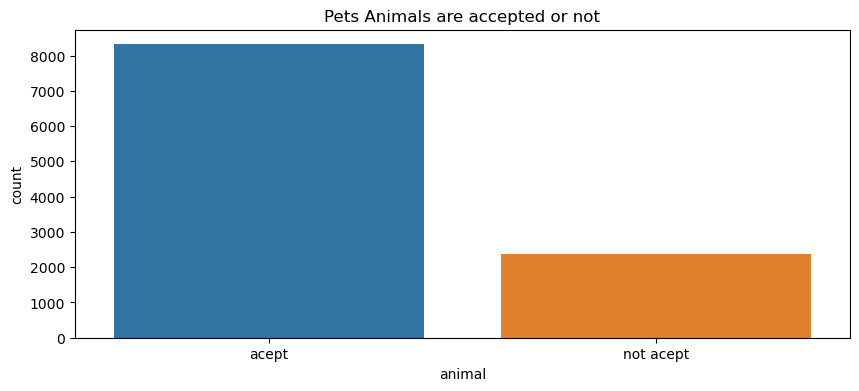

In [24]:
plt.figure(figsize=(10,4))
plt.title('Pets Animals are accepted or not')
sb.countplot(data=df,x=df['animal']);


conclusion:-Pet animals are accepted in the housing.

# Whether the houses is furnished or not.

In [25]:
info_of_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode values in furniture are: not furnished
Missing values in furniture: are 0


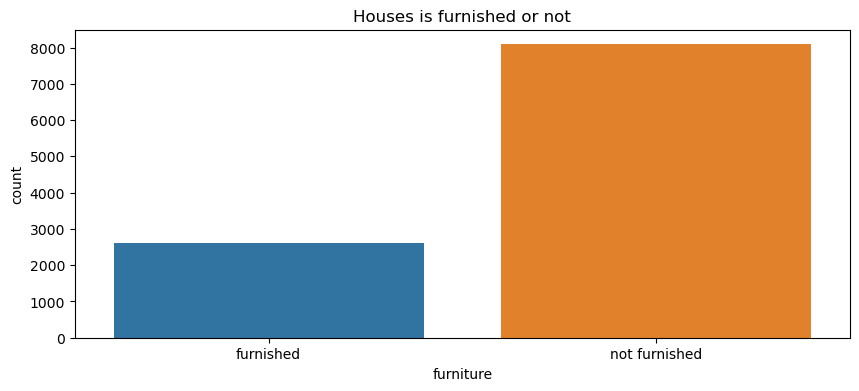

In [26]:
plt.figure(figsize=(10,4))
plt.title('Houses is furnished or not')
sb.countplot(data=df,x=df['furniture']);

conclusion:-The houses of furniture is not furnished in housing.

# Homeowner association tax.

In [27]:
info_of_numerical('hoa (R$)')

mean of the values in hoa (R$) are: 1174.0216984661429
median of the value in hoa (R$) are: 560.0
mode of the values in hoa (R$) are: 0
missing values in hoa (R$) are: 0


<AxesSubplot:xlabel='hoa (R$)'>

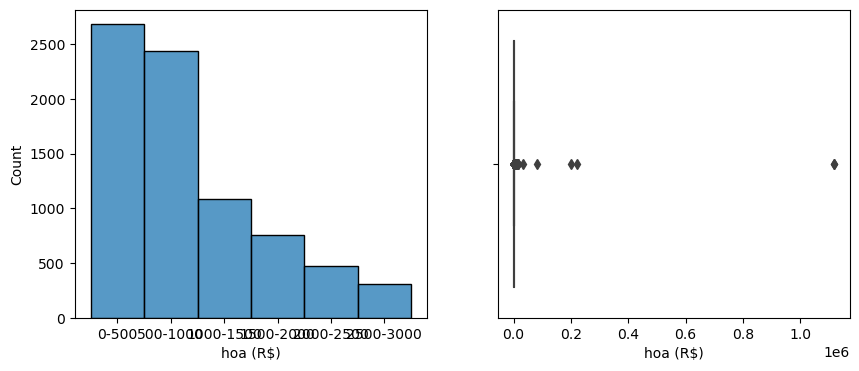

In [17]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
bins=[0,500,1000,1500,2000,2500,3000]
labels=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000']
x=pd.cut(x=df['hoa (R$)'],bins=bins,labels=labels)
sb.histplot(x=x,ax=ax[0])
sb.boxplot(data=df,x=df['hoa (R$)'],ax=ax[1])

# Rent amount of the property month-wise.

In [29]:
info_of_numerical('property tax (R$)')

mean of the values in property tax (R$) are: 366.70435839880287
median of the value in property tax (R$) are: 125.0
mode of the values in property tax (R$) are: 0
missing values in property tax (R$) are: 0


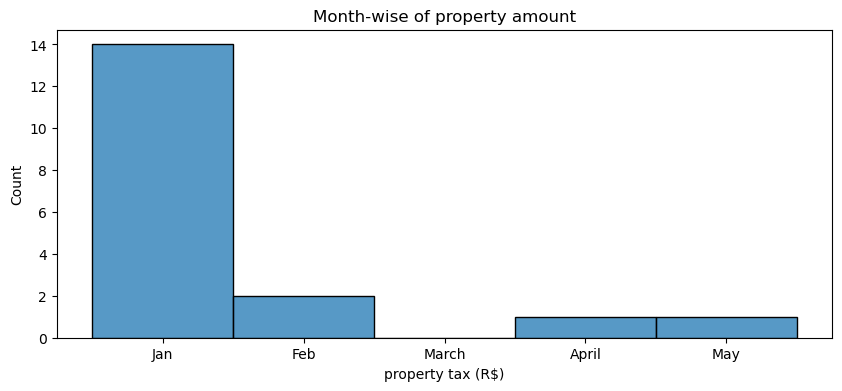

In [30]:
plt.figure(figsize=(10,4))
plt.title('Month-wise of property amount')
bins=[5000,10000,15000,20000,25000,30000]
labels=['Jan','Feb','March','April','May',]
x=pd.cut(df['property tax (R$)'],bins=bins,labels=labels)
sb.histplot(x=x);

conclusion:-The month of January has property of rent amount.

# Tax on the property.

In [31]:
info_of_numerical('property tax (R$)')

mean of the values in property tax (R$) are: 366.70435839880287
median of the value in property tax (R$) are: 125.0
mode of the values in property tax (R$) are: 0
missing values in property tax (R$) are: 0


<AxesSubplot:xlabel='property tax (R$)'>

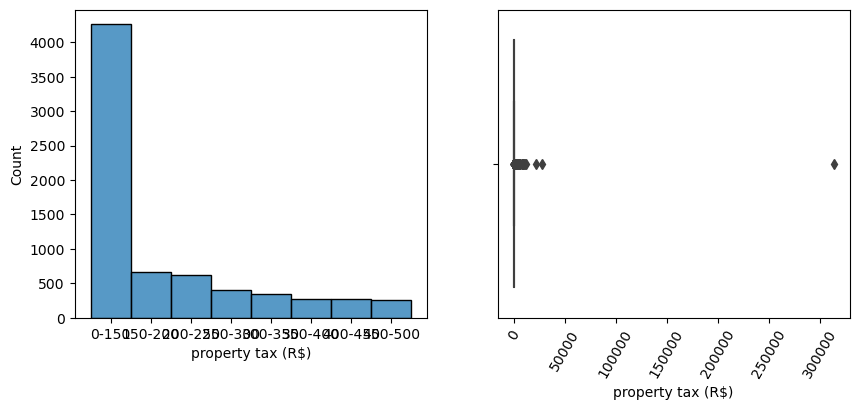

In [19]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
bins=[0,150,200,250,300,350,400,450,500]
labels=['0-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500']
x=pd.cut(x=df['property tax (R$)'],bins=bins,labels=labels)
sb.histplot(x=x,ax=ax[0])
plt.xticks(rotation=60)
sb.boxplot(data=df,x=df['property tax (R$)'],ax=ax[1])

conclusion:-Tax on the property of housing is 0-150.

# Cost of fire insurance of the houses.

In [33]:
info_of_numerical('fire insurance (R$)')

mean of the values in fire insurance (R$) are: 53.300879161990274
median of the value in fire insurance (R$) are: 36.0
mode of the values in fire insurance (R$) are: 16
missing values in fire insurance (R$) are: 0


<AxesSubplot:xlabel='fire insurance (R$)', ylabel='Count'>

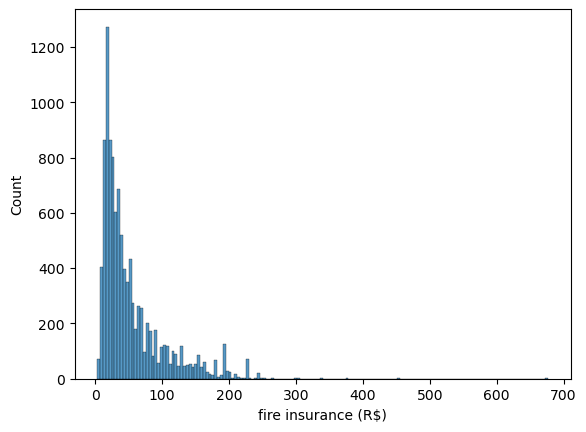

In [34]:
sb.histplot(data=df,x='fire insurance (R$)')

conclusion:-Cost of fire insurance of the houses is lies between 0-100.

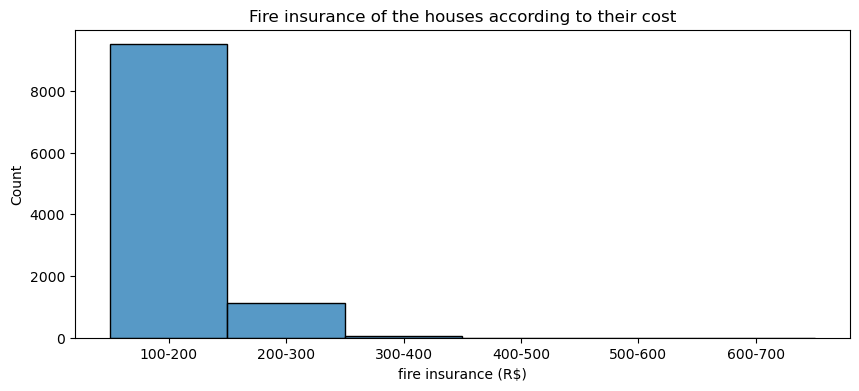

In [35]:
plt.figure(figsize=(10,4))
plt.title('Fire insurance of the houses according to their cost')
labels=['100-200','200-300','300-400','400-500','500-600','600-700']
x=pd.cut(df['fire insurance (R$)'],bins=6,labels=labels)
sb.histplot(data=x);

# Total of rent amount

In [24]:
info_of_numerical('total (R$)')

mean of the values in total (R$) are: 5490.4869996258885
median of the value in total (R$) are: 3581.5
mode of the values in total (R$) are: 2555
missing values in total (R$) are: 0


<AxesSubplot:xlabel='total (R$)'>

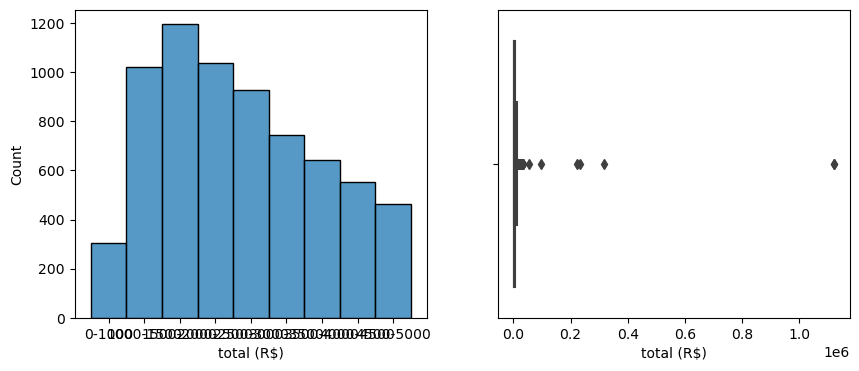

In [29]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
bins=[0,1000,1500,2000,2500,3000,3500,4000,4500,5000]
labels=['0-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','4500-5000']
x=pd.cut(x=df['total (R$)'],bins=bins,labels=labels)
sb.histplot(x=x,ax=ax[0])
sb.boxplot(data=df,x=df['total (R$)'],ax=ax[1])

conclusion:-majority of total amount are in 2000-2500.

# Bi-varient

# Name of the city and  Property area of the house in square meters.

In [30]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [31]:
info_of_cat('area')

Unique values in area are: [   70   320    80    51    25   376    72   213   152    35    26    46
    36    55   100   330   110    88    56   600    42   160    90    49
    41    64   208    20    32    45   350    38    30    40   300   240
   200   360   250    48   150    60    31   210   280    93    75   194
    65   278    61   130   164   220   108   128    47   170    68    63
   145    85   254   296   133    44    22    50    67   109   400   284
   309    73   155    58    94    76   192   217    95   900    34    62
   180   140    52   999   270    71   500    96   660   107   105   287
    24   154   101   384    57    39    78    28    83   750   258   123
   127   219   420    59   225   480    53   121    43   570    89   173
    91   530    87   136   308   260   120    33   131   161   720   236
    81   125    37   230   450   234   135   395    92   412   190   165
   380    19   124   115   700    15   204   540    23   178   114   113
    69   306   187   385

<Figure size 1500x700 with 0 Axes>

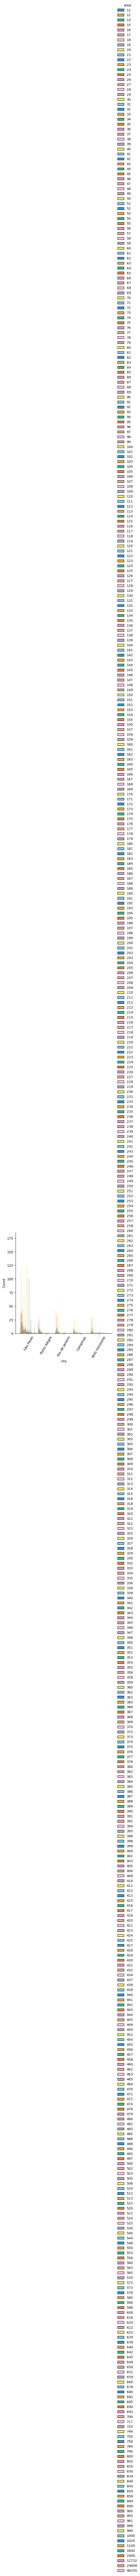

In [39]:
plt.figure(figsize=(15,7))
sb.displot(data=df,x='city',hue='area',multiple='dodge',palette='colorblind')
plt.xticks(rotation=60);

# Name of the city and Number of rooms.

In [47]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode values in rooms are: 3
Missing values in rooms: are 0


In [48]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


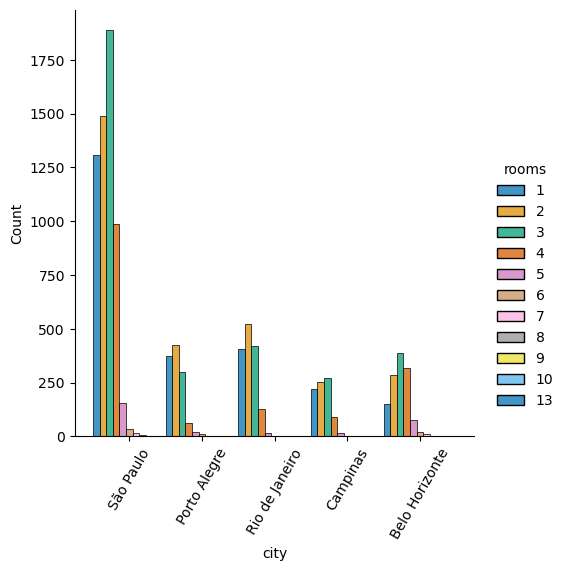

In [50]:
sb.displot(data=df,x='city',hue='rooms',multiple='dodge',kind='hist',palette='colorblind')
plt.xticks(rotation=60);

In [ ]:
conclusion:-Room number 1 and 13 

# Name of the city and Number of bathrooms.

In [51]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [52]:
info_of_cat('bathroom')

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode values in bathroom are: 1
Missing values in bathroom: are 0


<Figure size 1000x400 with 0 Axes>

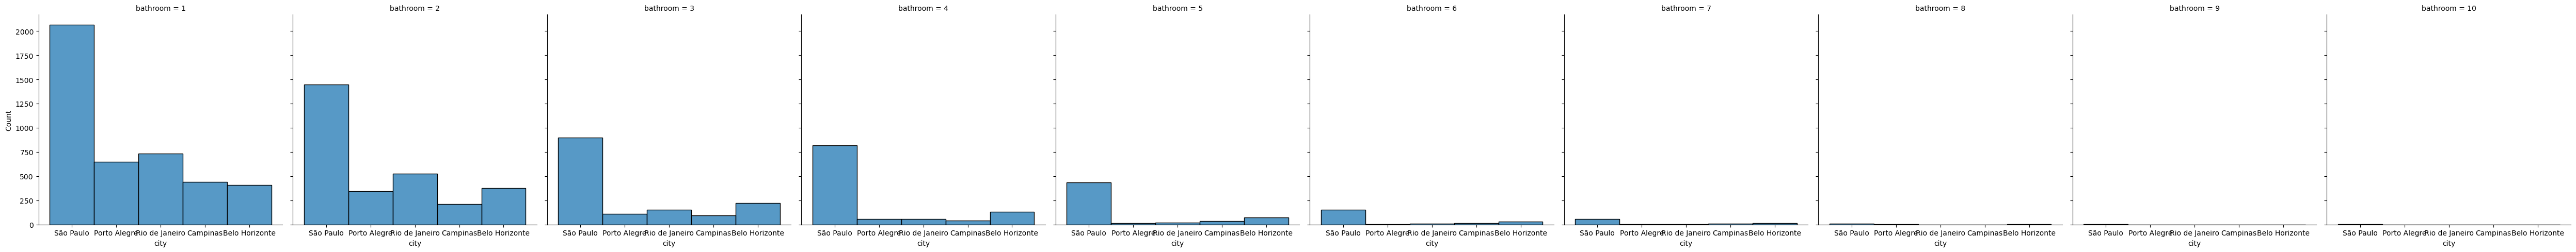

In [60]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='city',col='bathroom');


# Name of the city and  Number of parking spaces.

In [61]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [62]:
info_of_cat('parking spaces')

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode values in parking spaces are: 1
Missing values in parking spaces: are 0


<Figure size 1000x400 with 0 Axes>

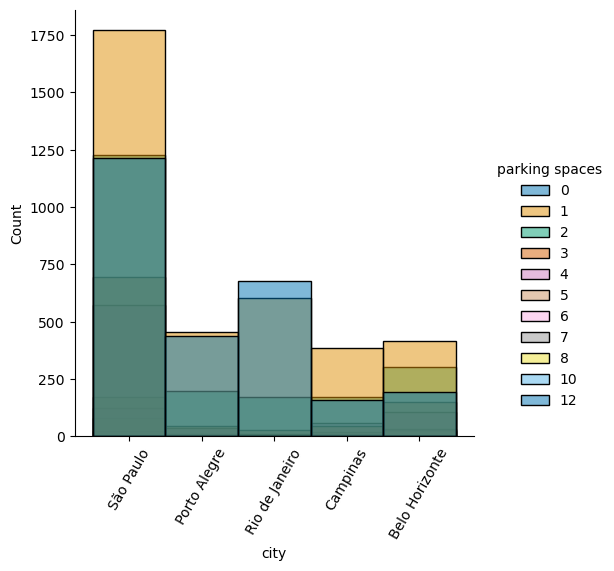

In [63]:
plt.figure(figsize=(10,4))
sb.displot(data=df,x='city',hue='parking spaces',kind='hist',palette='colorblind')
plt.xticks(rotation=60);

conclusion:-sao paulo having the more no.of parking spaces.

# Name of the city and  Number of floors in the building.

In [64]:
plt.figure(figsize=(10,4))
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


<Figure size 1000x400 with 0 Axes>

In [65]:
info_of_cat('floor')

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode values in floor are: 0
Missing values in floor: are 0


<Figure size 1500x700 with 0 Axes>

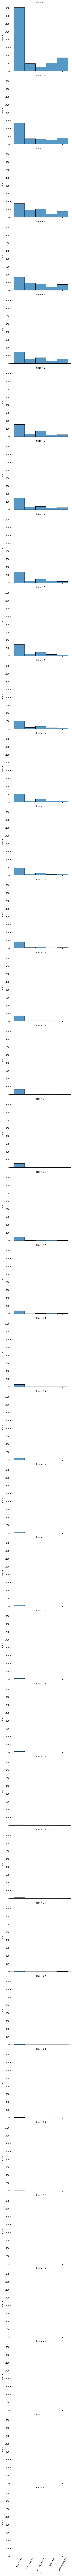

In [69]:
plt.figure(figsize=(15,7))
sb.displot(data=df,x='city',row='floor',multiple='dodge',palette='colorblind')
plt.xticks(rotation=60);

In [ ]:
conclusion:-

# Name of the city and  Whether animals are accepted or not

In [44]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [45]:
info_of_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode values in animal are: acept
Missing values in animal: are 0


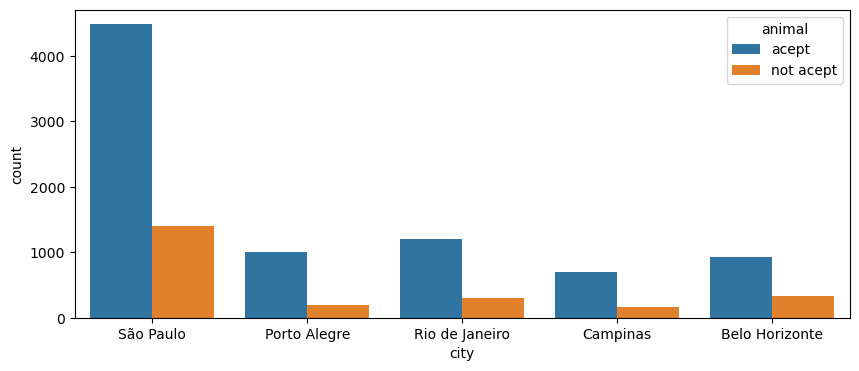

In [46]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x='city',hue='animal');

conclusion:-In the city of sao paulo animals are accepted and in the city of campinas animals are not accepted.

# Name of the city and Whether the house is furnished or not

In [41]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [42]:
info_of_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode values in furniture are: not furnished
Missing values in furniture: are 0


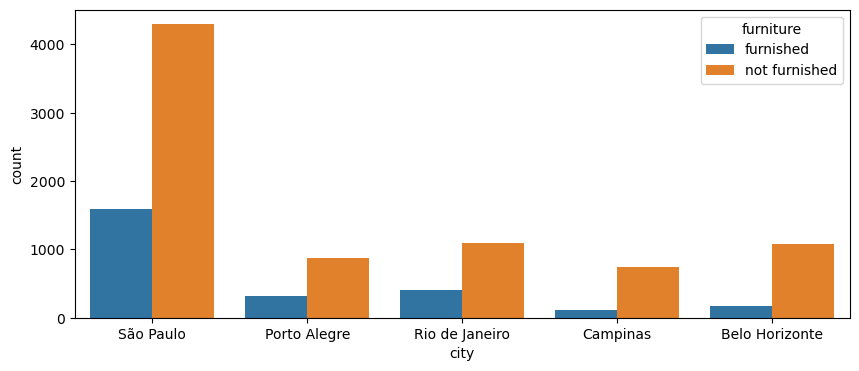

In [43]:
plt.figure(figsize=(10,4))
sb.countplot(data=df, x='city',hue='furniture');

conclusion:-In the city of sao paulo the furniture are not accepted.

# Name of the city and Homeowner association tax.

In [70]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [71]:
info_of_numerical('hoa (R$)')

mean of the values in hoa (R$) are: 1174.0216984661429
median of the value in hoa (R$) are: 560.0
mode of the values in hoa (R$) are: 0
missing values in hoa (R$) are: 0


<Figure size 1000x400 with 0 Axes>

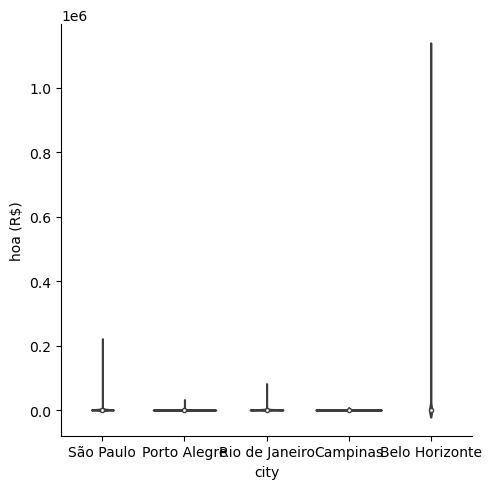

In [72]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='city',y='hoa (R$)',kind='violin')

conclusion:-Horizonte city having the more tax as compare to other city's.

# Name of the city and Rent amount of the property month-wise.

In [73]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [74]:
info_of_numerical('rent amount (R$)')

mean of the values in rent amount (R$) are: 3896.247194163861
median of the value in rent amount (R$) are: 2661.0
mode of the values in rent amount (R$) are: 2500
missing values in rent amount (R$) are: 0


<Figure size 1000x400 with 0 Axes>

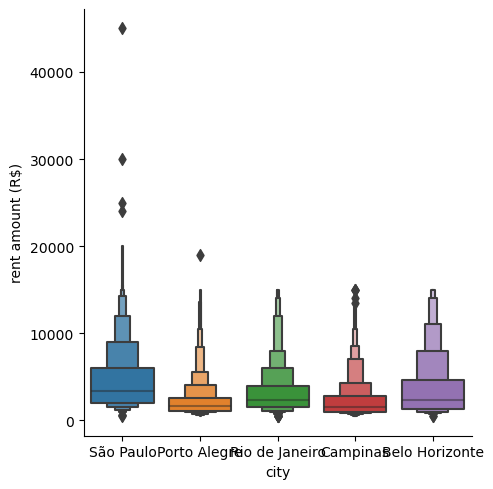

In [75]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='city',y='rent amount (R$)',kind='boxen')

conclusion:-sao paulo having the more rent amount of the property month-wise.

# Name of the city and Tax on the property.

In [76]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [77]:
info_of_numerical('property tax (R$)')

mean of the values in property tax (R$) are: 366.70435839880287
median of the value in property tax (R$) are: 125.0
mode of the values in property tax (R$) are: 0
missing values in property tax (R$) are: 0


<Figure size 1000x400 with 0 Axes>

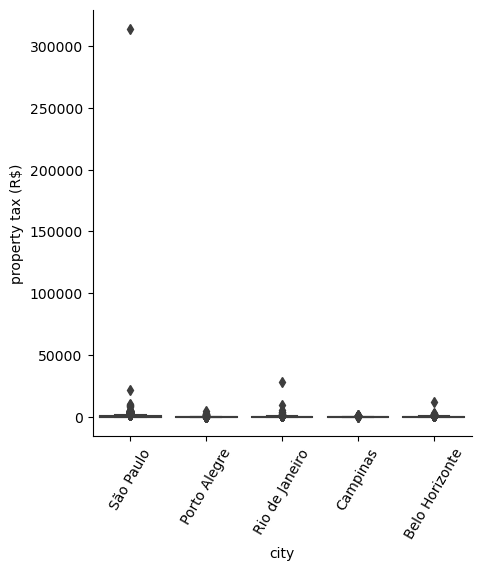

In [32]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='city',y='property tax (R$)',kind='box')
plt.xticks(rotation=60)
plt.show();

# Name of the city and Cost of the fire insurance of the house.

In [79]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [80]:
info_of_numerical('fire insurance (R$)')

mean of the values in fire insurance (R$) are: 53.300879161990274
median of the value in fire insurance (R$) are: 36.0
mode of the values in fire insurance (R$) are: 16
missing values in fire insurance (R$) are: 0


<Figure size 1000x400 with 0 Axes>

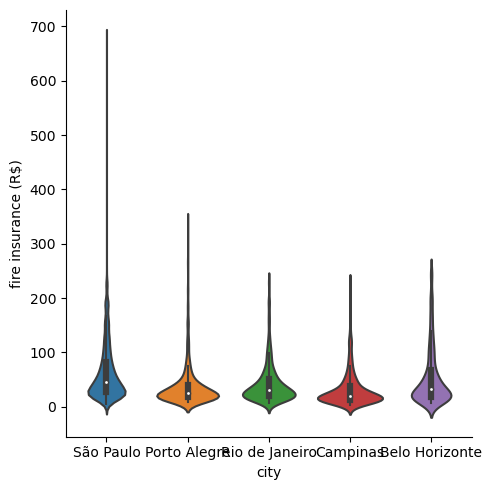

In [81]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='city',y='fire insurance (R$)',kind='violin')

conclusion:-sao paulo having the Cost of the fire insurance of the house as compare to other city's.

# Multi-varient.

In [41]:
info_of_cat('city')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode values in city are: São Paulo
Missing values in city: are 0


In [43]:
info_of_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode values in rooms are: 3
Missing values in rooms: are 0


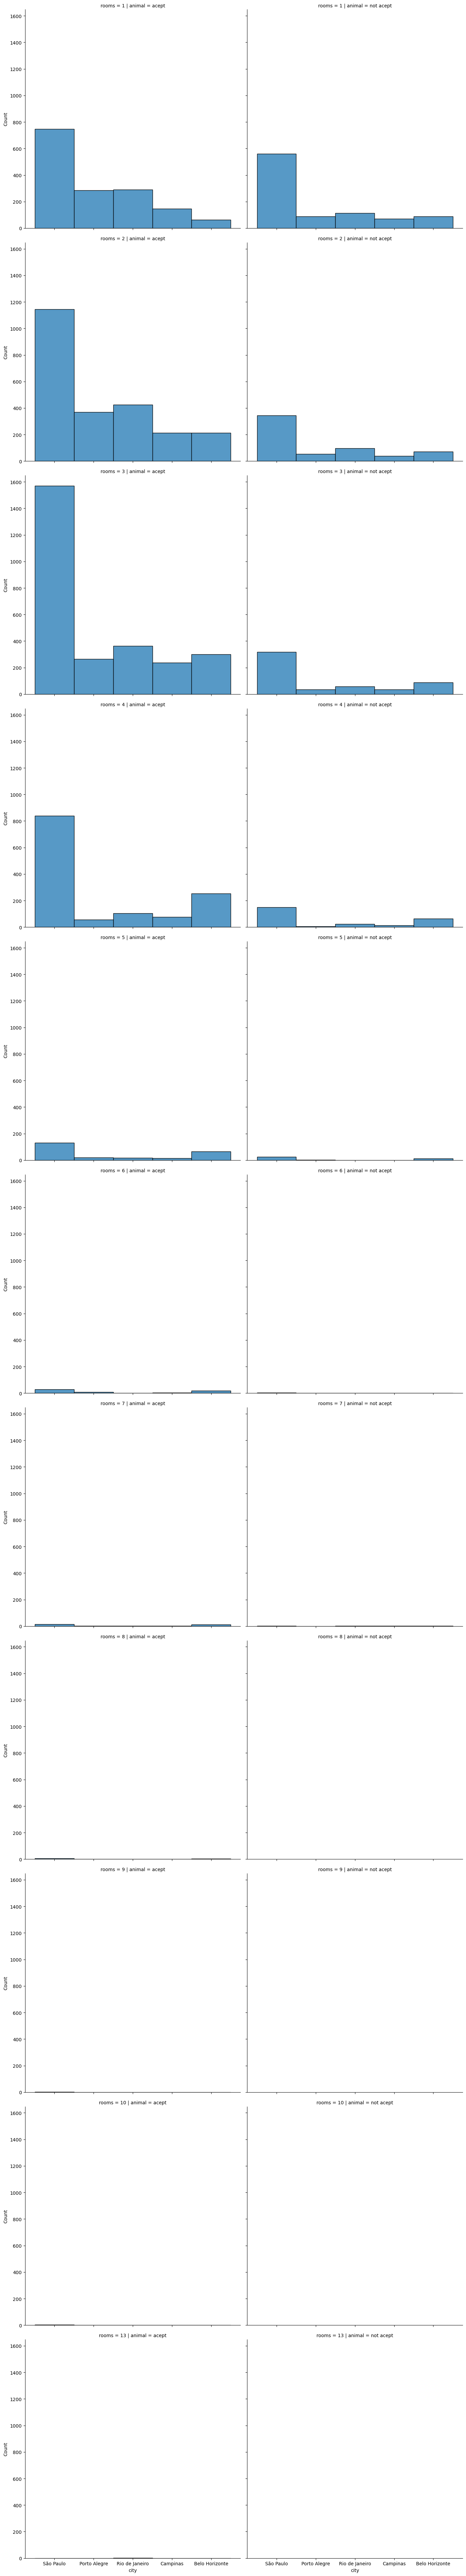

In [57]:
sb.displot(data=df,x='city',row='rooms',col='animal',height=7)

conclusion:-In room one animals are not accepted and in the room two accepted.

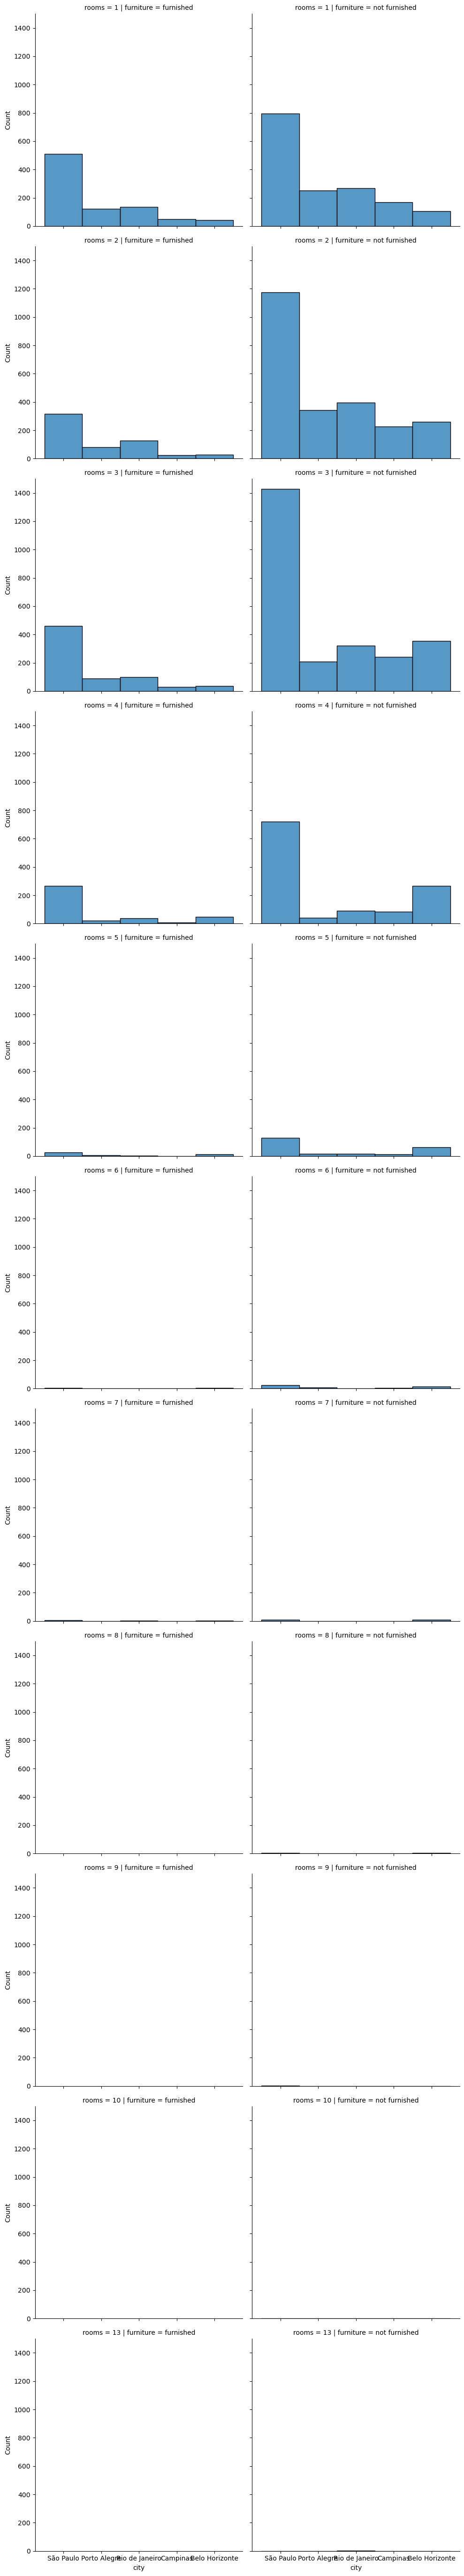

In [4]:
sb.displot(data=df,x='city',row='rooms',col='furniture')

conclusion:-In the room one the furnished is accepted and not accepted in second room.

<Figure size 1000x400 with 0 Axes>

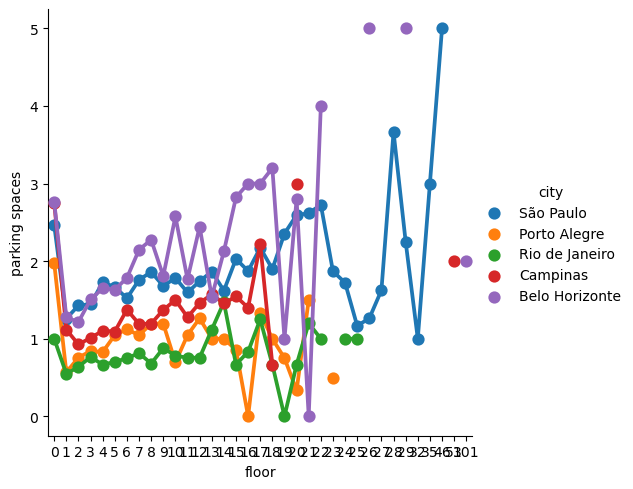

In [37]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='floor',y='parking spaces',hue='city',kind='point',ci=False)
plt.show()

conclusion:-Belo Horizonte having the parking space as compare to other city's.

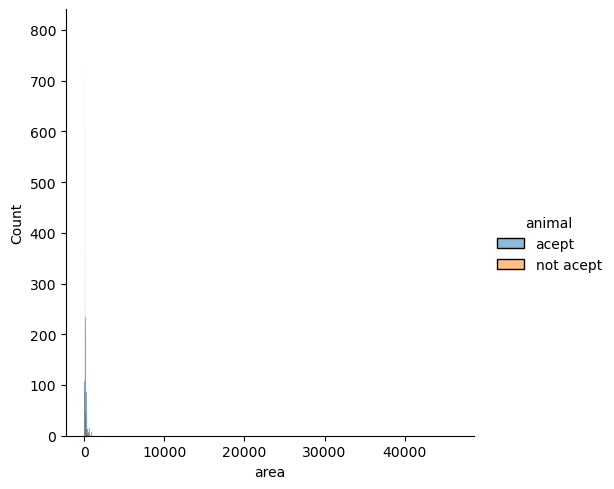

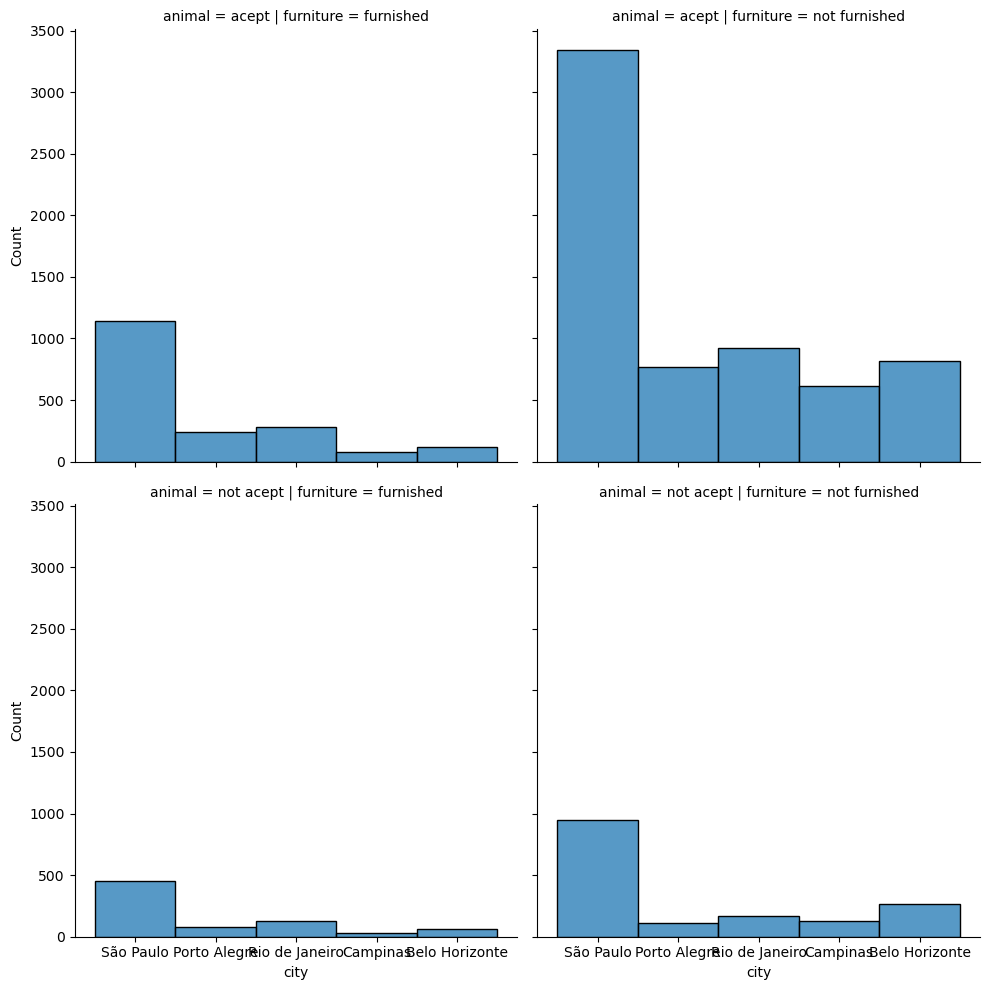

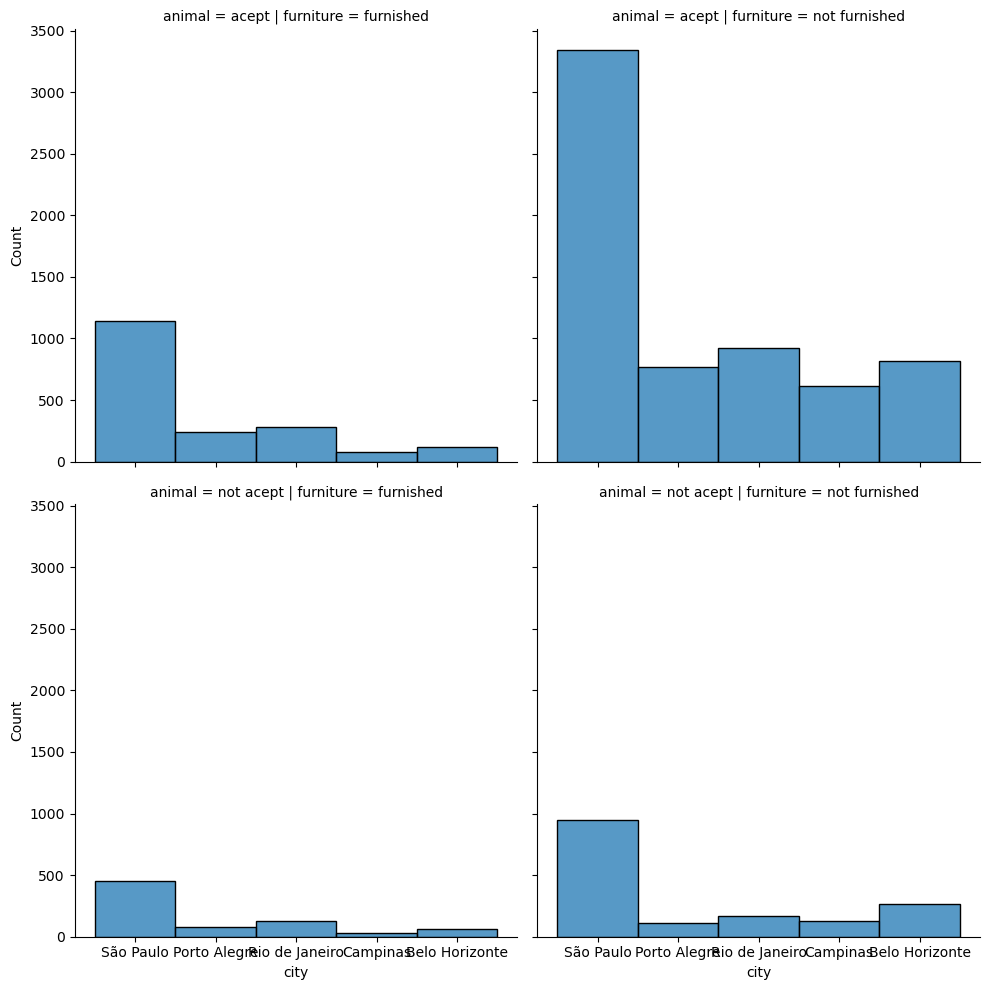

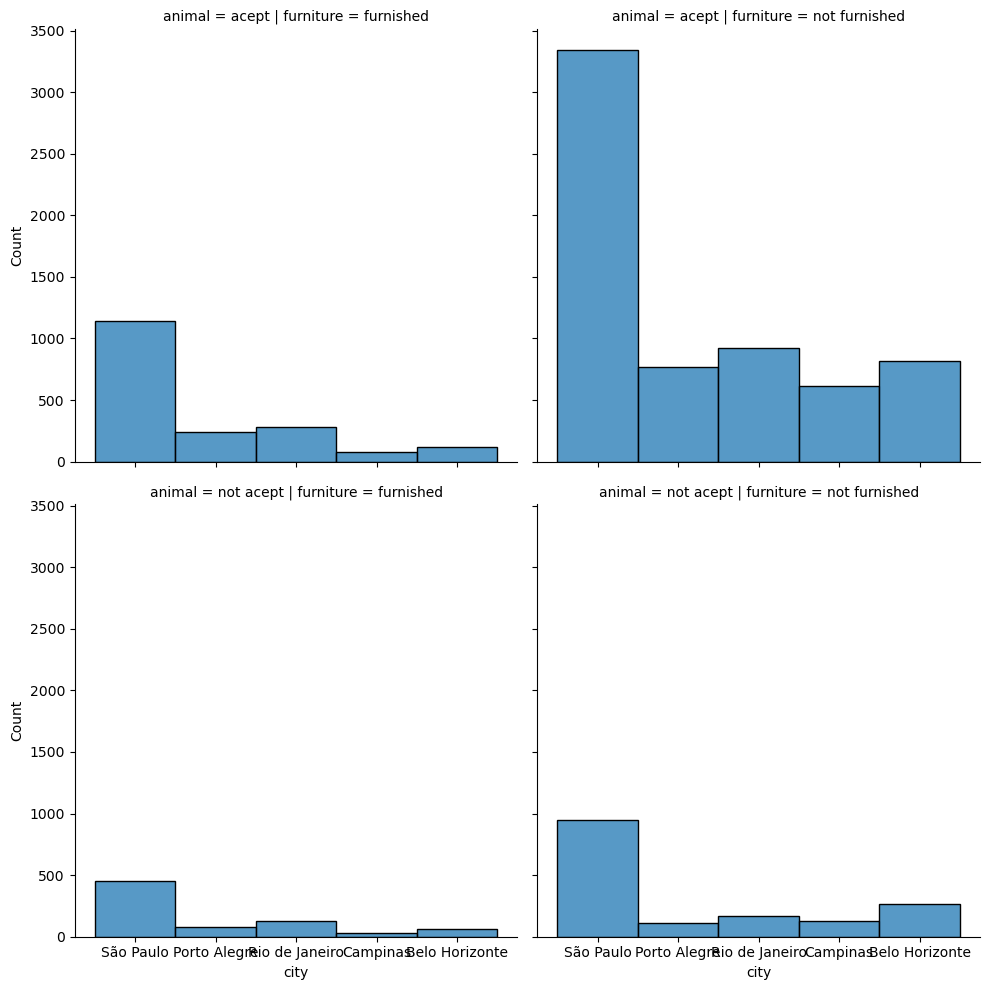

In [16]:
sb.displot(data=df,x='city',row='animal',col='furniture')
plt.show()

conclusion:-sao paulo the animals are accepted and the furniture are not accepted.

<Figure size 1000x400 with 0 Axes>

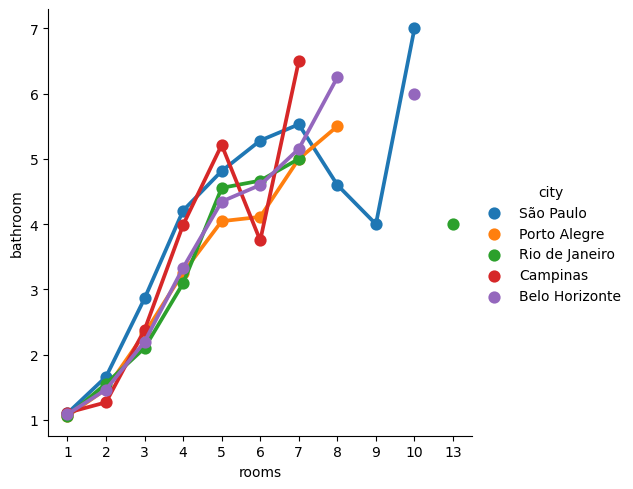

In [24]:
plt.figure(figsize=(10,4))
sb.catplot(data=df,x='rooms',y='bathroom',hue='city',kind='point',ci=False)
plt.show()

conclusion:-Belo Horizonte are having the more spread comapre to other ciyt's.

In [45]:
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [ ]:
df

In [ ]:
df.columns